# Data Description

# Importing the Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
df = pd.read_excel('Final_Train.xlsx')
df_test = pd.read_excel('Final_Test.xlsx')

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
# shapes

In [6]:
df.shape

(5961, 7)

# checking for the missing values in both of the sets

In [7]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

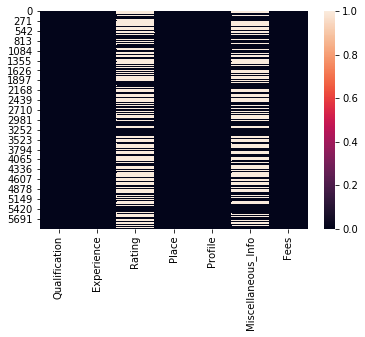

In [8]:
sns.heatmap(df.isna())

We see that Rating and Miscellaneous_info have large no. of null values

# Correlation

In [9]:
df.corr()

,Fees
Fees,1.0


# info on the dataypes of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [11]:
# description on the dataset.

In [12]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [13]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


There is only 1 numberical column (that is the target variable) and rest of the columns are categorical type features.

## Univariate Analysis and Feature Processing

In [14]:
df1 = df.copy()

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Qualification

In [16]:
df.Qualification.value_counts()

BDS                                                                                                                                                                                                                                                                                                                                                                          488
BHMS                                                                                                                                                                                                                                                                                                                                                                         477
BAMS                                                                                                                                                                                                                                                                  

In [17]:
df1.Qualification = df.Qualification.apply(lambda x:x.split(",")[0])

In [18]:
df1.Qualification.value_counts()

MBBS                                                      2448
BDS                                                       1208
BAMS                                                       711
BHMS                                                       706
MD - Dermatology                                            84
                                                          ... 
Diploma in Medical Trichology                                1
MD - Alternate Medicine                                      1
Post Graduate Diploma in Periodontics and Implantology       1
DM - Cardiology                                              1
FNB - Infectious Disease                                     1
Name: Qualification, Length: 151, dtype: int64

In [19]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS']

In [20]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,BSc - Zoology,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [21]:
df1[~df1.Qualification.isin(main_qualications)]['Qualification'].apply(lambda x:x.split(" ")[0])

3           BSc
9           BSc
20          MDS
29      Diploma
33           DM
         ...   
5936         MD
5944         MS
5950         MD
5953         MD
5955         MD
Name: Qualification, Length: 888, dtype: object

In [22]:
df1.Qualification = df1.Qualification.apply(lambda x: x.split(' ')[0])

In [23]:
pd.DataFrame(df1.Qualification.value_counts()).Qualification[:60]

MBBS             2448
BDS              1208
BAMS              711
BHMS              706
MD                327
MDS               164
MS                110
DNB                45
DHMS               36
Diploma            24
Get                24
DDVL               20
LCEH               14
Fellowship         10
B.Sc                9
PhD                 8
Post                7
BSAM                6
DDV                 5
DVD                 5
BSc                 4
DM                  3
G.A.M.S             3
MRCP                3
Certification       3
FCPS                2
BEMS                2
MSc                 2
Certificate         2
FRCS                2
MPH                 2
MDS-Oral            2
MRCS                2
MRCPS               2
GCEH                2
PG                  1
DGO                 1
Certified           1
M.Ch                1
M.D.                1
MDS-                1
FNB                 1
FAGE                1
BUMS                1
Ayurvedic           1
Diplomate 

In [24]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD', 'MDS', 'MS']

In [25]:
df1.Qualification = df1.Qualification.mask(~df1.Qualification.isin(main_qualications),'Other')

In [26]:
df1.Qualification.value_counts()

MBBS     2448
BDS      1208
BAMS      711
BHMS      706
MD        327
Other     287
MDS       164
MS        110
Name: Qualification, dtype: int64

In [27]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

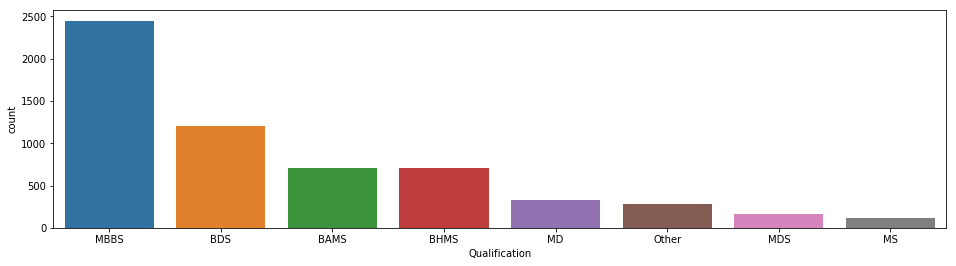

In [28]:
fig_this_size(16,4)
sns.countplot(df1.Qualification,order=df1.Qualification.value_counts().index)

* Most of the Doctors ahve the MBBS qualification.(Bachelor of Medicine and Bachelor of Surgery) So these the surgeons. 
* The next are the doctors with the BDS degree (Bachelor of Dental Surgery). So these are the Dentists.
* The next are the doctors with the BAMS degree. (Bachelor of Ayurvedic Medicine and Surgery). There are the aurvedic doctor.

# Experience

In [29]:
df.Experience

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
5956    19 years experience
5957    33 years experience
5958    41 years experience
5959    15 years experience
5960    17 years experience
Name: Experience, Length: 5961, dtype: object

In [30]:
df1.Experience = df.Experience.str.extract('(\d+)')
df1.rename(columns={'Experience':'Years_Of_Experience'},inplace=True)

In [31]:
df1.head()

,Qualification,Years_Of_Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,Other,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [32]:
#sns.distplot(df1.Yrs_of_Exp)

In [33]:
df1.Years_Of_Experience.dtype

dtype('O')

In [34]:
#type conversion
df1.Years_Of_Experience = df1.Years_Of_Experience.astype('int')

In [35]:
df1.Years_Of_Experience.dtype

dtype('int32')

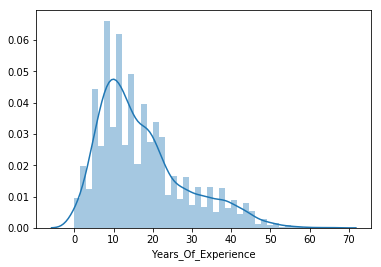

In [36]:
sns.distplot(df1.Years_Of_Experience)

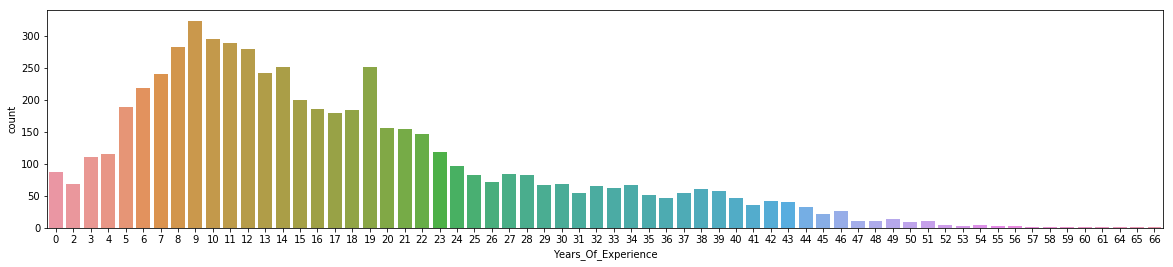

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(df1.Years_Of_Experience)

In [38]:
df1.Years_Of_Experience.describe()

count    5961.000000
mean       17.303976
std        11.142798
min         0.000000
25%         9.000000
50%        14.000000
75%        23.000000
max        66.000000
Name: Years_Of_Experience, dtype: float64

In [39]:
df1.kurtosis()

Years_Of_Experience    0.535196
Fees                  -0.162059
dtype: float64

## Rating

In [40]:
df.Rating.value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
73%       8
75%       8
74%       7
60%       7
78%       6
68%       5
56%       5
70%       4
69%       4
72%       3
57%       3
33%       2
55%       2
63%       2
62%       2
64%       2
58%       1
36%       1
48%       1
40%       1
47%       1
7%        1
65%       1
45%       1
53%       1
Name: Rating, dtype: int64

In [41]:
df1.Rating = df.Rating.str.strip('%').astype('float')

In [42]:
df1.Rating.dtype

dtype('float64')

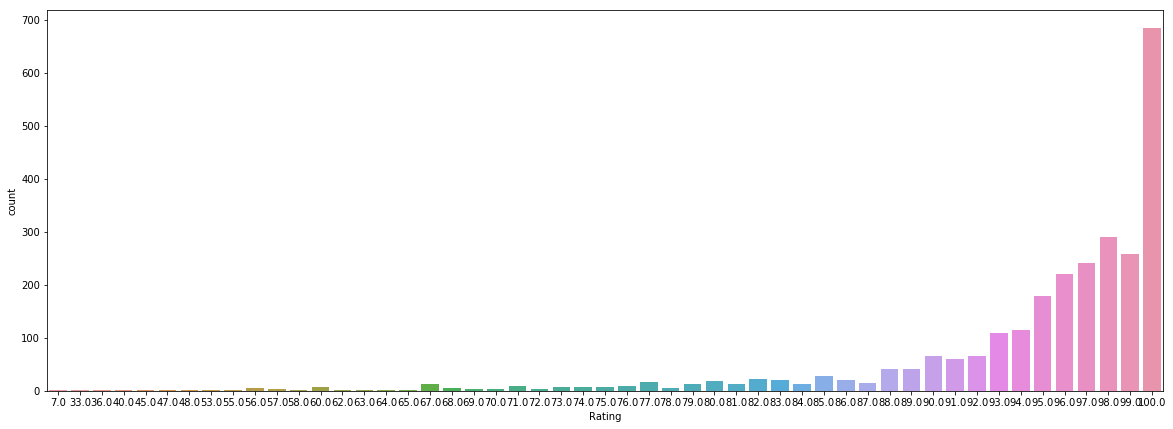

In [43]:
fig_this_size(20,7)
sns.countplot(df1.Rating)

Wee see that in majorit of cases doctor has 100% Values

In [44]:
## Place

In [45]:
df.Place.value_counts()

HSR Layout, Bangalore         75
Andheri West, Mumbai          70
Dwarka, Delhi                 67
Banjara Hills, Hyderabad      64
Mulund West, Mumbai           54
                              ..
PMG Jn, Thiruvananthapuram     1
Nayandahalli, Bangalore        1
Piravom, Ernakulam             1
Red Hills, Hyderabad           1
Jeevan Park, Delhi             1
Name: Place, Length: 877, dtype: int64

In [46]:
len(df.Place.unique())

878

In [47]:
df.Place

0                 Kakkanad, Ernakulam
1               Whitefield, Bangalore
2          Mathikere - BEL, Bangalore
3        Bannerghatta Road, Bangalore
4               Keelkattalai, Chennai
                    ...              
5956          Basavanagudi, Bangalore
5957            Nungambakkam, Chennai
5958    Greater Kailash Part 2, Delhi
5959           Vileparle West, Mumbai
5960                 Pitampura, Delhi
Name: Place, Length: 5961, dtype: object

In [48]:
df.Place.isna().sum()

25

In [49]:
df1.Place.value_counts()

HSR Layout, Bangalore         75
Andheri West, Mumbai          70
Dwarka, Delhi                 67
Banjara Hills, Hyderabad      64
Mulund West, Mumbai           54
                              ..
PMG Jn, Thiruvananthapuram     1
Nayandahalli, Bangalore        1
Piravom, Ernakulam             1
Red Hills, Hyderabad           1
Jeevan Park, Delhi             1
Name: Place, Length: 877, dtype: int64

In [50]:
## Profile

In [51]:
df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [52]:
## profile

In [53]:
df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

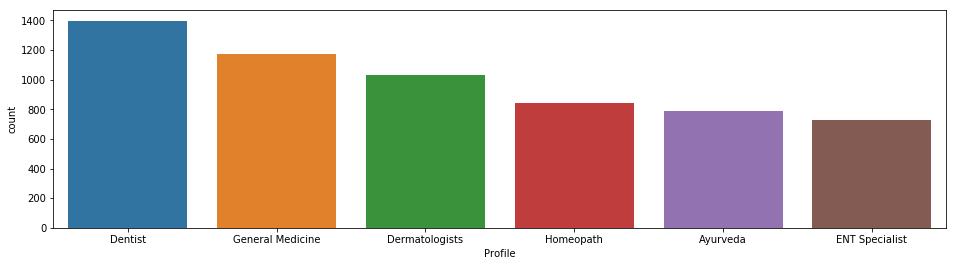

In [54]:
fig_this_size(16,4)
sns.countplot(df.Profile,order=df.Profile.value_counts().index)

* Most of the doctors are dentitsts by speciality.

In [55]:
## Miscelleanous_Info

In [56]:
df1.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
91% 38 Feedback Vasant Vihar, Delhi                                                      1
Acrylic Partial Denture Cast Partial Denture Artificial Teeth                            1
73% 24 Feedback Dwarka, Delhi                                                            1
Cosmetic/ Aesthetic Dentistry Laser Gum Surgery Teeth Reshaping                          1
97% 13 Feedback Kakkanad, Ernakulam                                                      1

* This feature is the general info.
* It contains some address,some specialzations, some feedbacks.
* We have all of these features ready thus, this is a redundant feature.
* Let's drop this feature.

In [57]:
df1.drop('Miscellaneous_Info',1,inplace=True)

In [58]:
df1

,Qualification,Years_Of_Experience,Rating,Place,Profile,Fees
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,Other,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,MBBS,19,98.0,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,MBBS,15,90.0,"Vileparle West, Mumbai",General Medicine,100


In [59]:
## Fees ( The target variable)

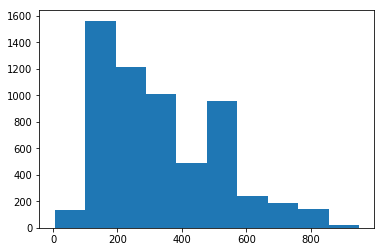

In [60]:
plt.hist(df.Fees);

In [61]:
df.Fees.describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

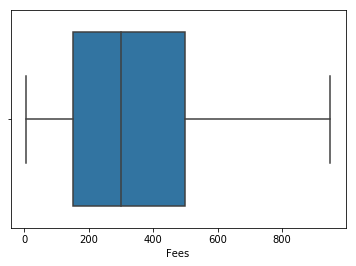

In [62]:
sns.boxplot(df.Fees)

In [63]:
## Multivariate analysis.

* Fees with respect to the Qualification of the doctors:

MBBS
BDS
BAMS
BHMS
MD
Other
MDS
MS


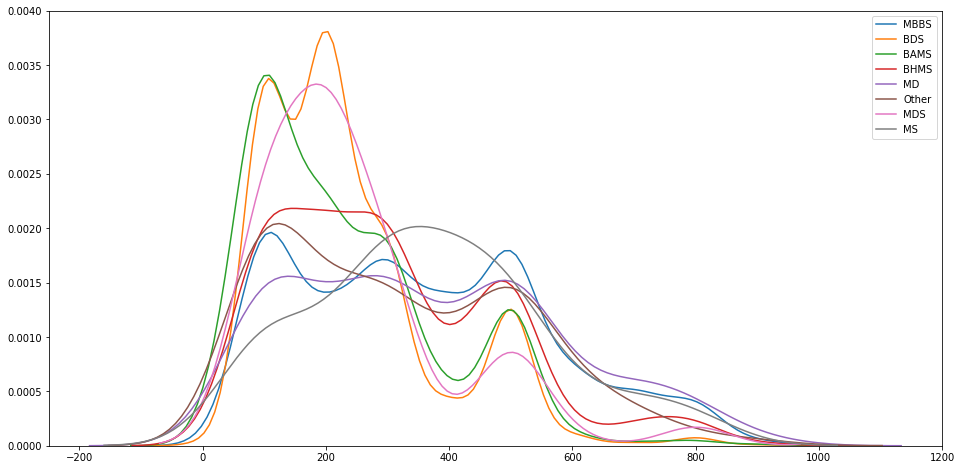

In [64]:
fig_this_size(16,8)
for Q in df1.Qualification.value_counts().index:
    print(Q)
    sns.kdeplot(df1[df1.Qualification == Q]['Fees'],label=Q)

* The doctors with BDS MDS charge high fees. We can infer that the fees or a dentitst is much higher that that of an MBBS .

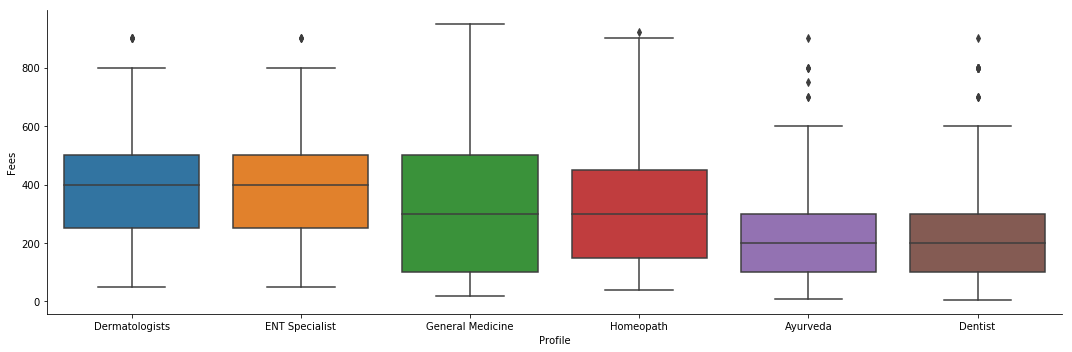

In [65]:
sns.catplot(x='Profile',y='Fees',data=df1,kind='box',aspect=3,order=df1.groupby('Profile')['Fees'].mean().sort_values(ascending=False).index)

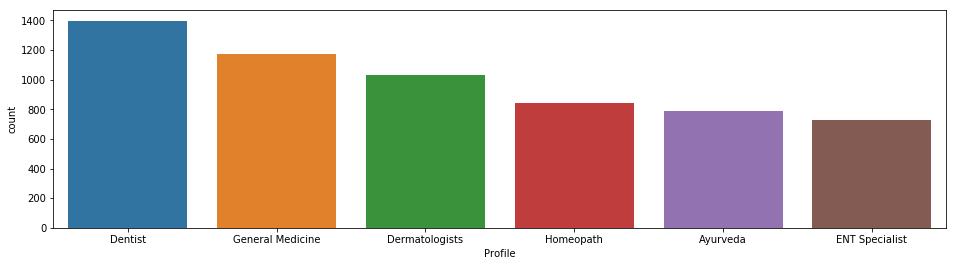

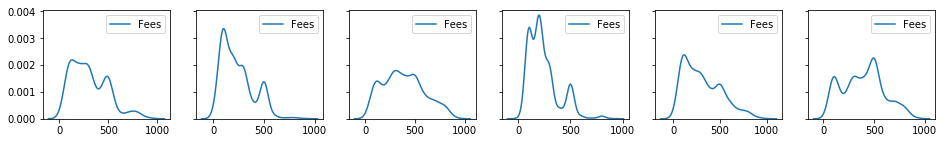

In [66]:
fig_this_size(16,4)
sns.countplot(x=df['Profile'],order=df1.Profile.value_counts().index)

fig,ax = plt.subplots(1,6,figsize=(16,2),sharey=True)
for i,cat in enumerate(df1.Profile.unique()):

    sns.kdeplot(df1[df1.Profile == cat]['Fees'],ax=ax[i])


In [67]:
df1[df1.Profile == 'Dentist']['Fees'].var()

20051.50234948836

In [68]:
df1[df1.Profile == 'Dermatologists']['Fees'].var()

40736.92892759442

In [69]:
# years of experience vs Ratings

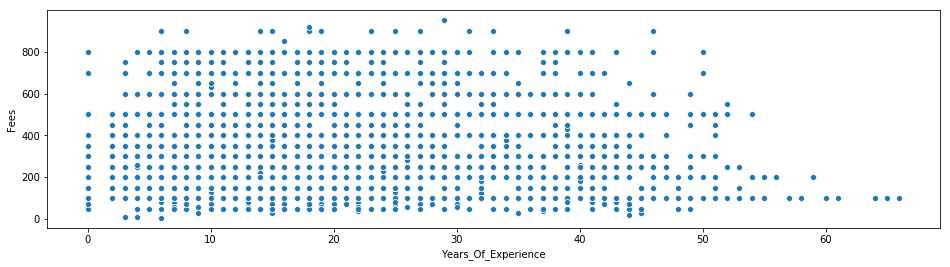

In [70]:
fig_this_size(16,4)
sns.scatterplot(df1.Years_Of_Experience,df1.Fees)

In [71]:
## Fees with respect to places.

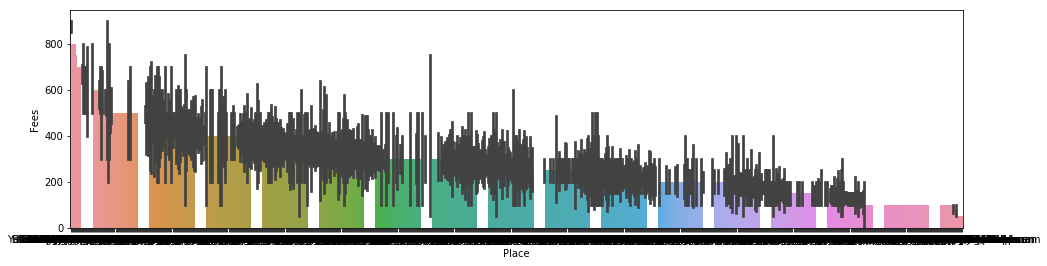

In [72]:
fig_this_size(16,4)
sns.barplot(df1.Place,df1.Fees,order=df1.groupby('Place')['Fees'].mean().sort_values(ascending=False).index)

Bangalore has the highest average Doctor's Consulatancy Fees.

In [73]:
# ratings with respect to places.

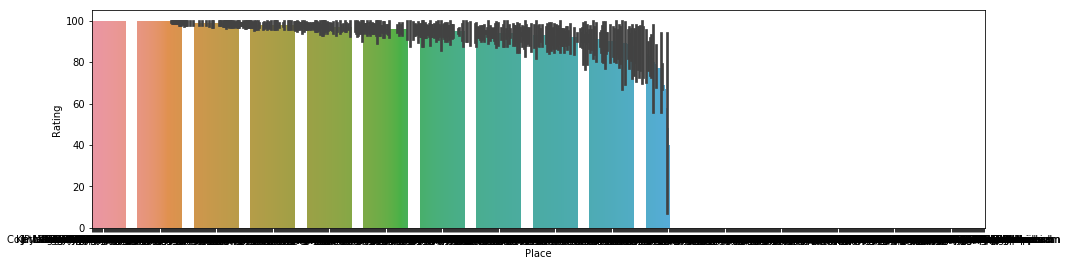

In [74]:
fig_this_size(16,4)
sns.barplot(df1.Place,df1.Rating,order=df1.groupby('Place')['Rating'].mean().sort_values(ascending=False).index)

* Ratings are independent of the Place.

In [75]:
df1.drop('Place',1,inplace=True)
df1.head()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
0,BHMS,24,100.0,Homeopath,100
1,BAMS,12,98.0,Ayurveda,350
2,MBBS,9,NaN,ENT Specialist,300
3,Other,12,NaN,Ayurveda,250
4,BAMS,20,100.0,Ayurveda,250


# Encode the Data

In [76]:
cols=['Qualification', 'Profile']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    df1[i]=le.fit_transform(df1[i]) 

In [77]:
df1.head()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
0,2,24,100.0,5,100
1,0,12,98.0,0,350
2,3,9,NaN,3,300
3,7,12,NaN,0,250
4,0,20,100.0,0,250


## Removing the outliers of the dataset

In [78]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(5961, 5)

In [79]:
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1,
       4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1,
       4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [80]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(5961, 5)
(0, 5)


So we don't go for Outlier Removal

# We need to fill missing Values

In [81]:
df1.isna().sum()

Qualification             0
Years_Of_Experience       0
Rating                 3302
Profile                   0
Fees                      0
dtype: int64

Rating has high Missing Values in Dataset

So we need to replace these Rating Values with mean values

In [82]:
df1['Rating'].fillna(df1['Rating'].mean(),inplace=True)

In [83]:
df1.isna().sum()

Qualification          0
Years_Of_Experience    0
Rating                 0
Profile                0
Fees                   0
dtype: int64

## Splitting the train and test set

In [84]:
df1.head()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
0,2,24,100.000000,5,100
1,0,12,98.000000,0,350
2,3,9,94.643475,3,300
3,7,12,94.643475,0,250
4,0,20,100.000000,0,250


In [85]:
df1.corr()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
Qualification,1.000000,0.112146,-0.115917,0.433147,0.190880
Years_Of_Experience,0.112146,1.000000,-0.177438,0.202073,0.002117
Rating,-0.115917,-0.177438,1.000000,-0.111018,-0.090106
Profile,0.433147,0.202073,-0.111018,1.000000,0.145226
Fees,0.190880,0.002117,-0.090106,0.145226,1.000000


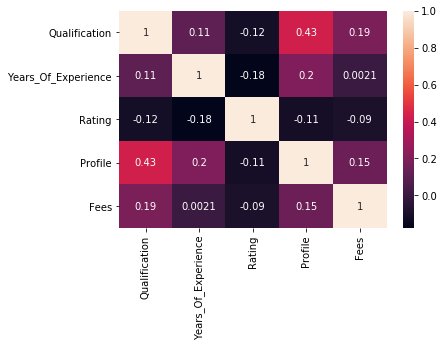

In [86]:
sns.heatmap(df1.corr(),annot=True)

In [87]:
x =df1.drop('Fees',axis=1)
y =df1['Fees']

In [88]:
# check shape
x.shape,y.shape

((5961, 4), (5961,))

# Finding Best Random State

In [89]:
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.06918089231551372 on Random_State 74


So we will use Random State Value of 74

# Performing Train-Test Split


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=74)


In [91]:
df1.describe()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,2.476262,17.303976,94.643475,2.441872,307.944640
std,1.682265,11.142798,5.244204,1.658014,190.920373
min,0.000000,0.000000,7.000000,0.000000,5.000000
25%,1.000000,9.000000,94.643475,1.000000,150.000000
50%,3.000000,14.000000,94.643475,2.000000,300.000000
75%,3.000000,23.000000,96.000000,4.000000,500.000000
max,7.000000,66.000000,100.000000,5.000000,950.000000


## Training Our Model.

In [92]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [93]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mscore=m.score(x_train,y_train)
    print('Score;', mscore)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Score; 0.040830092967786835
Mean Absolute error: of LinearRegression()
154.569758289944
Mean Squared error: of LinearRegression()
34930.69049941053
Root Mean Squared error: of LinearRegression()
186.897540110646
r2 score: of LinearRegression()
0.06918089231551372
Cross Validation Score: 0.045057611665778464
Difference Between r2_score and CrossValidation Score: 0.024123280649735256


Score; 0.04083009284245731
Mean Absolute error: of Ridge()
154.5699633108794
Mean Squared error: of Ridge()
34930.7324443519
Root Mean Squared error: of Ridge()
186.89765232434544
r2 score: of Ridge()
0.06917977458344637
Cross Validation Score: 0.04505772004993638
Difference Between r2_score and CrossValidation Score: 0.024122054533509997


Score; 0.040814283916237204
Mean Absolute error: of Lasso()
154.64528254886267
Mean Squared error: of Lasso()
34950.44762405905
Root Mean Squared error: of Lasso()
186.95038813562022
r2 score: of Lasso()
0.06865441233836966
Cross Validation Score: 0.04505525775362884
Di

We see Random Forest Regressor is our best model

## Saving the model

In [94]:
import joblib

In [95]:
joblib.dump(rf,'doctors_consuluation.obj')

['doctors_consuluation.obj']